In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        y_ = np.array([1 if i > 0 else 0 for i in y])

        converged = False
        epoch = 0

        while not converged and epoch < self.n_iterations:
            converged = True
            print(f"Epoch {epoch + 1}")
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.tlu(linear_output)

                print(f"  Sample {x_i}:")
                print(f"    Linear Output: {linear_output}, "
                      "Predicted: {y_predicted}, True: {y_[idx]}")

                if y_[idx] != y_predicted:
                    converged = False
                    update = self.learning_rate * (y_[idx] - y_predicted)
                    print(f"    Update: Weight change = {update * x_i}, Bias change = {update}")
                    self.weights += update * x_i
                    self.bias += update
                    print(f"    New Weights: {self.weights}, New Bias: {self.bias}")

            epoch += 1

        return epoch

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.tlu(linear_output)
        return y_predicted

    def tlu(self, x):
        return np.where(x >= 0, 1, 0)

# Sample data for demonstration (AND gate)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])  # AND gate truth table

print("Training Perceptron on AND gate:")
print("Input data:")
for i, (inputs, label) in enumerate(zip(X, y)):
    print(f"  {inputs} -> {label}")
print()

# Create and train the Perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=10)
epochs_trained = perceptron.fit(X, y)

# Print the final learned parameters
print("Training complete!")
print(f"Epochs trained: {epochs_trained}")
print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")

# Test the trained Perceptron
print("\nTesting the trained Perceptron:")
for inputs, label in zip(X, y):
    prediction = perceptron.predict(inputs.reshape(1, -1))
    print(f"Input: {inputs}, True Label: {label}, Predicted: {prediction[0]} "
          "-> {'Correct' if label == prediction[0] else 'Incorrect'}")

# Optional: Visualize the decision boundary (for 2D data)
def plot_decision_boundary(X, y, perceptron):
    plt.figure(figsize=(8, 6))
    
    # Plot data points
    colors = ['red', 'blue']
    for i in range(2):
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=f'Class {i}', s=100)
    
    # Create decision boundary
    if perceptron.weights is not None:
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        
        # Decision boundary: w1*x1 + w2*x2 + bias = 0
        # Solve for x2: x2 = -(w1*x1 + bias) / w2
        if perceptron.weights[1] != 0:
            x_boundary = np.array([x_min, x_max])
            y_boundary = -(perceptron.weights[0] \
                           *  x_boundary + perceptron.bias) \
                           / perceptron.weights[1]
            plt.plot(x_boundary, y_boundary, 'k--', label='Decision Boundary')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.show()


Training Perceptron on AND gate:
Input data:
  [0 0] -> 0
  [0 1] -> 0
  [1 0] -> 0
  [1 1] -> 1

Epoch 1
  Sample [0 0]:
    Linear Output: 0.0, Predicted: {y_predicted}, True: {y_[idx]}
    Update: Weight change = [-0. -0.], Bias change = -0.1
    New Weights: [0. 0.], New Bias: -0.1
  Sample [0 1]:
    Linear Output: -0.1, Predicted: {y_predicted}, True: {y_[idx]}
  Sample [1 0]:
    Linear Output: -0.1, Predicted: {y_predicted}, True: {y_[idx]}
  Sample [1 1]:
    Linear Output: -0.1, Predicted: {y_predicted}, True: {y_[idx]}
    Update: Weight change = [0.1 0.1], Bias change = 0.1
    New Weights: [0.1 0.1], New Bias: 0.0
Epoch 2
  Sample [0 0]:
    Linear Output: 0.0, Predicted: {y_predicted}, True: {y_[idx]}
    Update: Weight change = [-0. -0.], Bias change = -0.1
    New Weights: [0.1 0.1], New Bias: -0.1
  Sample [0 1]:
    Linear Output: 0.0, Predicted: {y_predicted}, True: {y_[idx]}
    Update: Weight change = [-0.  -0.1], Bias change = -0.1
    New Weights: [0.1 0. ], New 

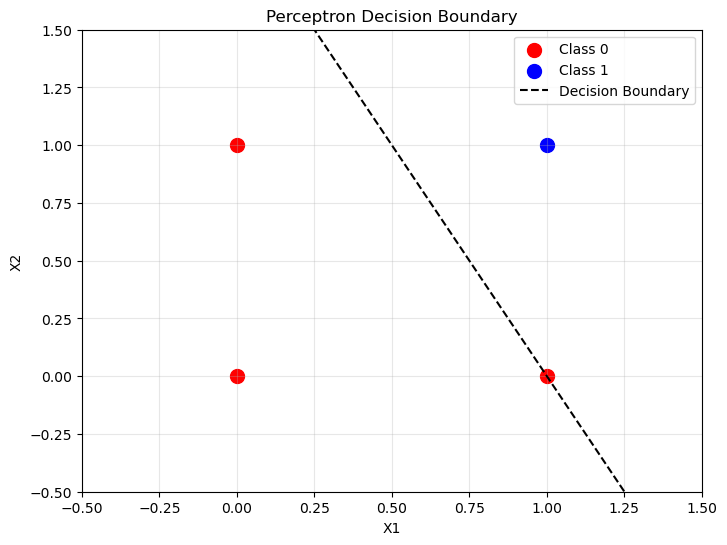

In [9]:
# Plot the results
plot_decision_boundary(X, y, perceptron)